According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient

## Importing The Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing the Dataset

In [2]:
df = pd.read_csv('D:/ML lab 3/data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Exploratory Data Analysis

In [4]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### Countplot for gender

<AxesSubplot:xlabel='gender', ylabel='count'>

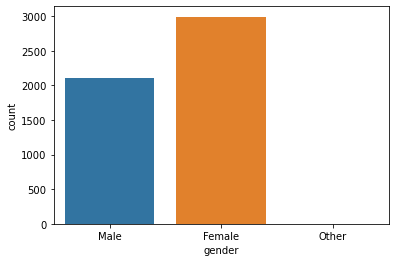

In [6]:
sns.countplot(x="gender",data=df)

### Number of peple who smoked based on Gender

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

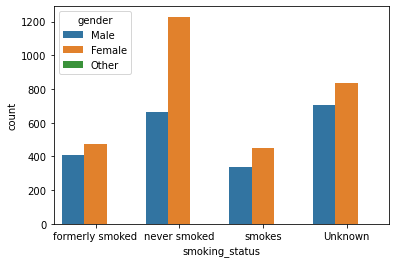

In [7]:
sns.countplot(x="smoking_status",data=df,hue=df['gender'])

### Number of people who had strokes based on gender 

<AxesSubplot:xlabel='stroke', ylabel='count'>

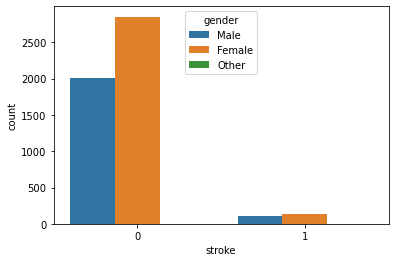

In [8]:
sns.countplot(x="stroke",data=df,hue=df['gender'])

### Divisions of Age

C:\Users\Arka Lodh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age'>

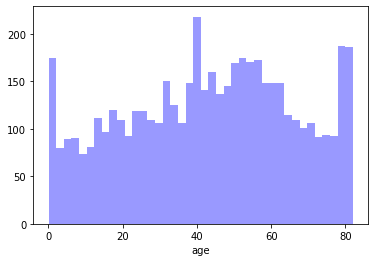

In [9]:
sns.distplot(df['age'],kde=False,bins=40,color='blue')

### Division of people who had heart disease based on Age

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

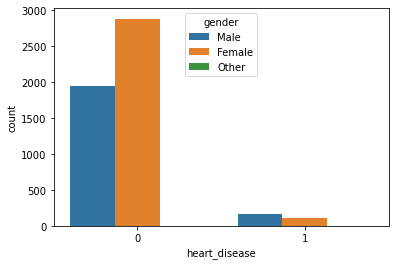

In [10]:
sns.countplot(x=df['heart_disease'],hue=df['gender'])

### Correlation graph for all variables

<AxesSubplot:>

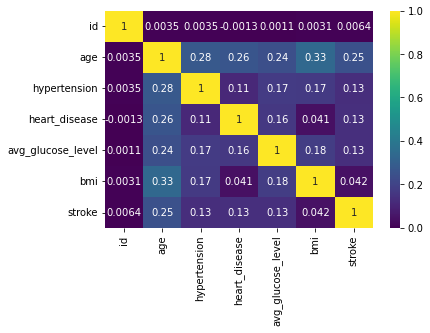

In [11]:
sns.heatmap(df.corr(),annot=True,cmap='viridis')

## Feature Engineering

In [12]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<AxesSubplot:>

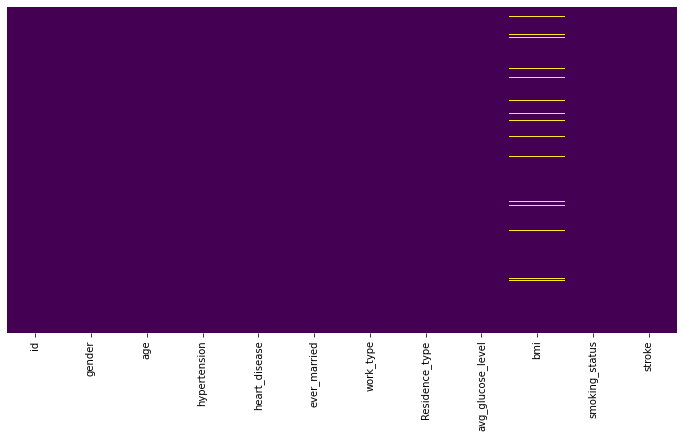

In [13]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Dropping the id Column

In [14]:
df.drop(['id'],axis = 1,inplace = True)

In [15]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Encoding categorical variable Gender

In [16]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [17]:
df['gender']=df['gender'].map({'Male':0,'Female':1,'Other':2})
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,1,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,0,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,1,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Encoding the categorical variable ever_married

In [18]:
df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [19]:
df['ever_married']=df['ever_married'].map({'Yes':1,'No':0})
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,1,61.0,0,0,1,Self-employed,Rural,202.21,NaN,never smoked,1
2,0,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,1,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,1,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1


### Encoding the categorical variable work_type

In [20]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [21]:
def alter(col):
    if col=='Private':
        return 0
    elif col == 'Self-employed':
        return 1
    elif col == 'Govt_job':
        return 2
    elif col == 'children':
        return 3
    else:
        return 4
df['work_type'] = df['work_type'].apply(alter)

In [22]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,0,Urban,228.69,36.6,formerly smoked,1
1,1,61.0,0,0,1,1,Rural,202.21,NaN,never smoked,1
2,0,80.0,0,1,1,0,Rural,105.92,32.5,never smoked,1
3,1,49.0,0,0,1,0,Urban,171.23,34.4,smokes,1
4,1,79.0,1,0,1,1,Rural,174.12,24.0,never smoked,1


### Encoding the categorical variable Residence_type 

In [23]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [24]:
df['Residence_type'] = pd.get_dummies(df['Residence_type'],drop_first=1)

In [25]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,0,1,228.69,36.6,formerly smoked,1
1,1,61.0,0,0,1,1,0,202.21,NaN,never smoked,1
2,0,80.0,0,1,1,0,0,105.92,32.5,never smoked,1
3,1,49.0,0,0,1,0,1,171.23,34.4,smokes,1
4,1,79.0,1,0,1,1,0,174.12,24.0,never smoked,1


### Encoding the categorical variable smoking_status

In [26]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [27]:
def change(col):
    if col == 'formerly smoked':
        return 0
    elif col == 'never smoked':
        return 1
    elif col == 'smokes':
        return 2
    else:
        return 3
df['smoking_status'] = df['smoking_status'].apply(change)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,0,1,228.69,36.6,0,1
1,1,61.0,0,0,1,1,0,202.21,NaN,1,1
2,0,80.0,0,1,1,0,0,105.92,32.5,1,1
3,1,49.0,0,0,1,0,1,171.23,34.4,2,1
4,1,79.0,1,0,1,1,0,174.12,24.0,1,1


### Filling miissing values in bmi column

In [28]:
df['bmi'].unique()

array([36.6,  nan, 32.5, 34.4, 24. , 29. , 27.4, 22.8, 24.2, 29.7, 36.8,
       27.3, 28.2, 30.9, 37.5, 25.8, 37.8, 22.4, 48.9, 26.6, 27.2, 23.5,
       28.3, 44.2, 25.4, 22.2, 30.5, 26.5, 33.7, 23.1, 32. , 29.9, 23.9,
       28.5, 26.4, 20.2, 33.6, 38.6, 39.2, 27.7, 31.4, 36.5, 33.2, 32.8,
       40.4, 25.3, 30.2, 47.5, 20.3, 30. , 28.9, 28.1, 31.1, 21.7, 27. ,
       24.1, 45.9, 44.1, 22.9, 29.1, 32.3, 41.1, 25.6, 29.8, 26.3, 26.2,
       29.4, 24.4, 28. , 28.8, 34.6, 19.4, 30.3, 41.5, 22.6, 56.6, 27.1,
       31.3, 31. , 31.7, 35.8, 28.4, 20.1, 26.7, 38.7, 34.9, 25. , 23.8,
       21.8, 27.5, 24.6, 32.9, 26.1, 31.9, 34.1, 36.9, 37.3, 45.7, 34.2,
       23.6, 22.3, 37.1, 45. , 25.5, 30.8, 37.4, 34.5, 27.9, 29.5, 46. ,
       42.5, 35.5, 26.9, 45.5, 31.5, 33. , 23.4, 30.7, 20.5, 21.5, 40. ,
       28.6, 42.2, 29.6, 35.4, 16.9, 26.8, 39.3, 32.6, 35.9, 21.2, 42.4,
       40.5, 36.7, 29.3, 19.6, 18. , 17.6, 19.1, 50.1, 17.7, 54.6, 35. ,
       22. , 39.4, 19.7, 22.5, 25.2, 41.8, 60.9, 23

In [29]:
df['bmi'] = df['bmi'].fillna(df['bmi'].median())
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,0,1,228.69,36.6,0,1
1,1,61.0,0,0,1,1,0,202.21,28.1,1,1
2,0,80.0,0,1,1,0,0,105.92,32.5,1,1
3,1,49.0,0,0,1,0,1,171.23,34.4,2,1
4,1,79.0,1,0,1,1,0,174.12,24.0,1,1


### Dividing dataset into Independent and dependent variable


In [30]:
X = df.iloc[:,:-1].values

In [31]:
y = df.iloc[:,-1].values

### Dividing dataset into train and test set

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 0)

### Feature Scaling

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Traning Decision Tree Model

In [34]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 0,criterion='entropy')
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### Predicting and printing test set results

In [36]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 1]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 1]
 [0 0]]


### Making confusion matrix and accuracy score

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
accuracy_score(y_test, y_pred)

[[928  40]
 [ 47   7]]


0.9148727984344422

### Training Random Forest model

In [38]:
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier(criterion = 'entropy',random_state = 0,n_estimators = 10)
classifier2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

### Predicting and printing test set results

In [39]:
y_pred2 = classifier2.predict(X_test)
print(np.concatenate((y_pred2.reshape(len(y_pred2),1), y_test.reshape(len(y_test),1)),1))

[[0 1]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 1]
 [0 0]]


### Making confusion matrix and accuracy score

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred2)
print(cm)
accuracy_score(y_test, y_pred2)

[[967   1]
 [ 54   0]]


0.9461839530332681

### K-Fold Cross Validation 

In [41]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier , X=X_train , y=y_train , cv=10)
print('Accuracy: {:.2f} %'.format(accuracies.mean()*100))
print('Standard deviation: {:.2f} %'.format(accuracies.std()*100))

Accuracy: 91.10 %
Standard deviation: 1.05 %


### K-Fold Cross Validation

In [42]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier2 , X=X_train , y=y_train , cv=10)
print('Accuracy: {:.2f} %'.format(accuracies.mean()*100))
print('Standard deviation: {:.2f} %'.format(accuracies.std()*100))

Accuracy: 94.86 %
Standard deviation: 0.35 %


### Hyper Parameter Tuning using RandomizedSearchCV

In [43]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}
grid = RandomizedSearchCV(classifier2, param_grid,cv=10, random_state = 0)
grid.fit(X_train, y_train)

RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(criterion='entropy',
                                                    n_estimators=10,
                                                    random_state=0),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [130, 180, 230]},
                   random_state=0)

### Getting the best parameter

In [44]:
grid.best_params_
grid.best_score_
grid.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=110, min_samples_leaf=4,
                       n_estimators=180, random_state=0)

### Training Random Forest Model with best parameter

In [46]:
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier(criterion='entropy', max_depth=110, min_samples_leaf=4,
                       n_estimators=180, random_state=0)
classifier3.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=110, min_samples_leaf=4,
                       n_estimators=180, random_state=0)

### Predicting and printing test set results

In [47]:
y_pred3 = classifier3.predict(X_test)
print(np.concatenate((y_pred3.reshape(len(y_pred3),1), y_test.reshape(len(y_test),1)),1))

[[0 1]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 1]
 [0 0]]


### Making confusion matrix and accuracy score

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm2 = confusion_matrix(y_test, y_pred3)
print(cm2)
accuracy_score(y_test, y_pred3)

[[968   0]
 [ 54   0]]


0.9471624266144814

In [ ]:
# from sklearn.datasets import load_iris
# from sklearn import tree
# # clf = tree.DecisionTreeClassifier()
# # iris = load_iris()
# # clf = clf.fit(iris.data, iris.target)
# tree.export_graphviz(classifier,
# out_file='tree.dot')

# import six
# import sys
# sys.modules['sklearn.externals.six'] = six
# from sklearn.externals.six import StringIO  
# import pydot 
# dot_data = StringIO() 
# tree.export_graphviz(classifier, out_file=dot_data) 
# graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
# # graph[0].write_pdf("iris.pdf")
# print(graph)

### Printing decision Tree

[Text(261.52513392857145, 319.0695652173913, 'X[1] <= 0.532\nentropy = 0.277\nsamples = 4088\nvalue = [3893, 195]'),
 Text(50.269821428571426, 304.88869565217396, 'X[1] <= -0.262\nentropy = 0.081\nsamples = 2709\nvalue = [2682, 27]'),
 Text(9.565714285714286, 290.7078260869565, 'X[1] <= -0.527\nentropy = 0.008\nsamples = 1601\nvalue = [1600, 1]'),
 Text(6.377142857142857, 276.5269565217392, 'entropy = 0.0\nsamples = 1296\nvalue = [1296, 0]'),
 Text(12.754285714285714, 276.5269565217392, 'X[1] <= -0.483\nentropy = 0.032\nsamples = 305\nvalue = [304, 1]'),
 Text(9.565714285714286, 262.34608695652173, 'X[7] <= -0.654\nentropy = 0.126\nsamples = 58\nvalue = [57, 1]'),
 Text(6.377142857142857, 248.16521739130437, 'X[7] <= -0.684\nentropy = 0.337\nsamples = 16\nvalue = [15, 1]'),
 Text(3.1885714285714286, 233.98434782608697, 'entropy = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(9.565714285714286, 233.98434782608697, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(12.754285714285714, 24

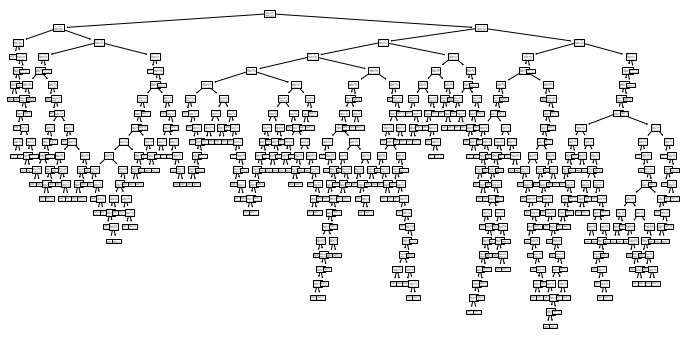

In [49]:
from sklearn import tree
tree.plot_tree(classifier)

In [50]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

### Printing decision tree in second way

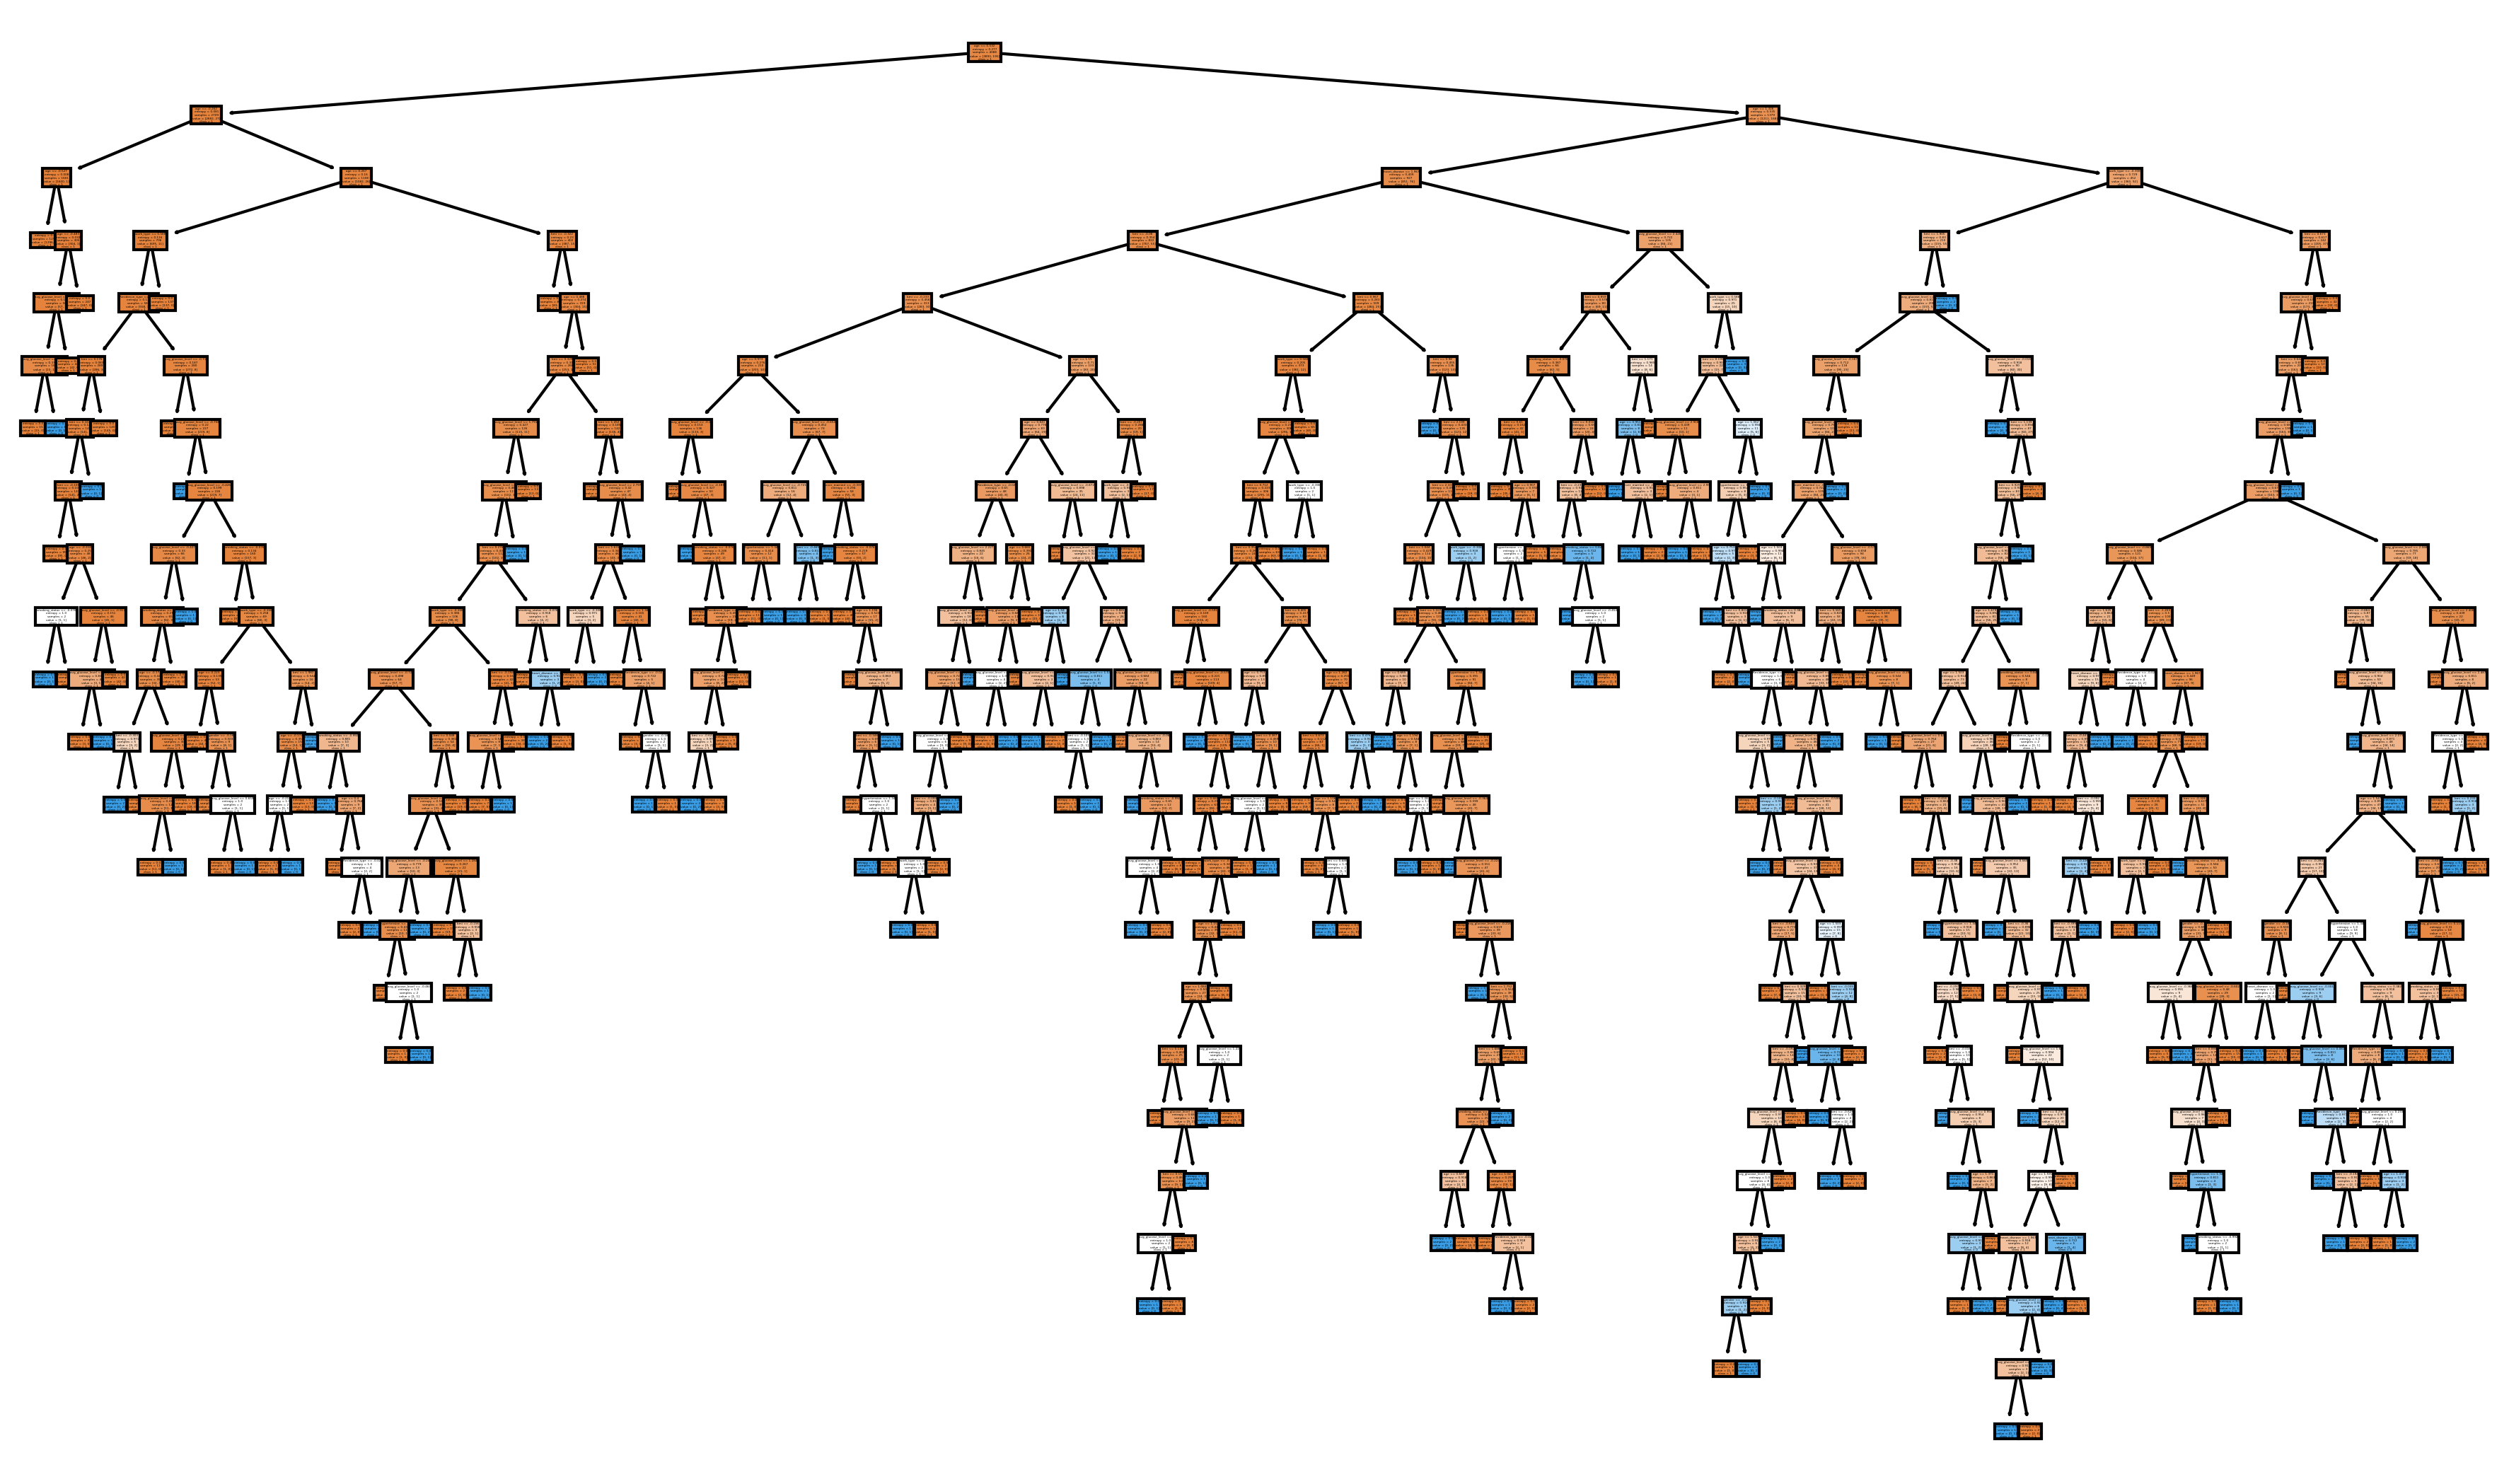

In [55]:
fn=['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']
cn=['1','0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,9), dpi=300)
tree.plot_tree(classifier,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')